In [1]:
pip install psycopg2 pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

def fetch_data_from_db():
    try:
        conn = psycopg2.connect(
            host=DB_HOST,
            port=DB_PORT,
            dbname=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD
        )

        query = "SELECT * FROM products" 
        df = pd.read_sql(query, conn)

        conn.close()
        return df

    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

data = fetch_data_from_db()

data.head()


/var/folders/q0/z5dr4dys38n8z0_74srn11h00000gn/T/ipykernel_58599/2215819076.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,name,category,price,city
0,1,"Семга Атлантическая (Лосось) Охлажденная, 3-4 ...",Рыба,11 800 Т,Astana
1,2,Дорадо Охлажденная вес 300-400 гр/шт Турция,Рыба,7 590 Т,Astana
2,3,Сибас Охлажденный весом 300 - 400 гр/шт,Рыба,7 590 Т,Astana
3,4,Дорадо Охлажденная вес 400 - 600 гр./шт,Рыба,7 590 Т,Astana
4,5,Сибас Охлажденный 400 - 600 гр/шт,Рыба,7 590 Т,Astana


In [2]:
category_counts = data['category'].value_counts()
category_counts


category
Бакалея            181
Антипасти          138
Рыба               108
Снэки, сладости    105
Икра                51
Масло               47
Мясо                29
Сыры                28
Name: count, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        687 non-null    int64 
 1   name      687 non-null    object
 2   category  687 non-null    object
 3   price     687 non-null    object
 4   city      687 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.0+ KB


In [4]:
data['price'] = data['price'].str.replace(r'[^\d.]', '', regex=True)
data['price'] = pd.to_numeric(data['price'], errors='coerce')
print(data['price'].head())

0    11800
1     7590
2     7590
3     7590
4     7590
Name: price, dtype: int64


In [5]:
avg_price_per_category = data.groupby('category')['price'].mean()
avg_price_per_category

category
Антипасти           6166.956522
Бакалея             5955.027624
Икра               59833.137255
Масло               9501.914894
Мясо               18106.551724
Рыба               10858.518519
Снэки, сладости     3927.142857
Сыры               19163.571429
Name: price, dtype: float64

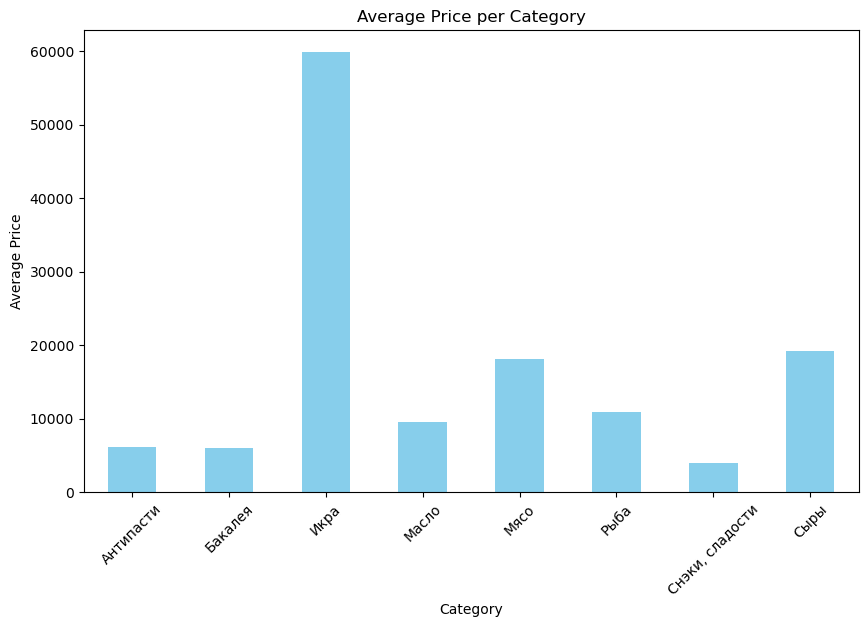

In [10]:
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('avg_price.png', bbox_inches='tight', dpi=300)
plt.show()

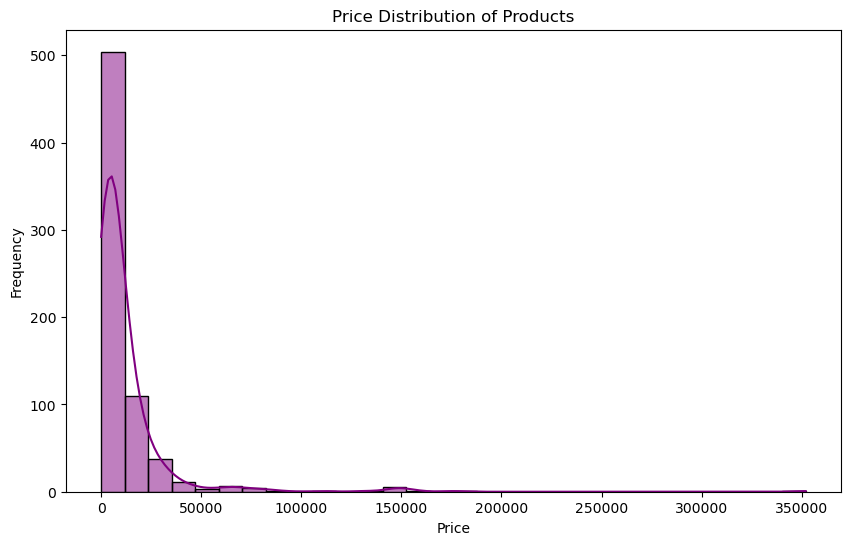

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30, color='purple')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('price_distribution.png', bbox_inches='tight', dpi=300)

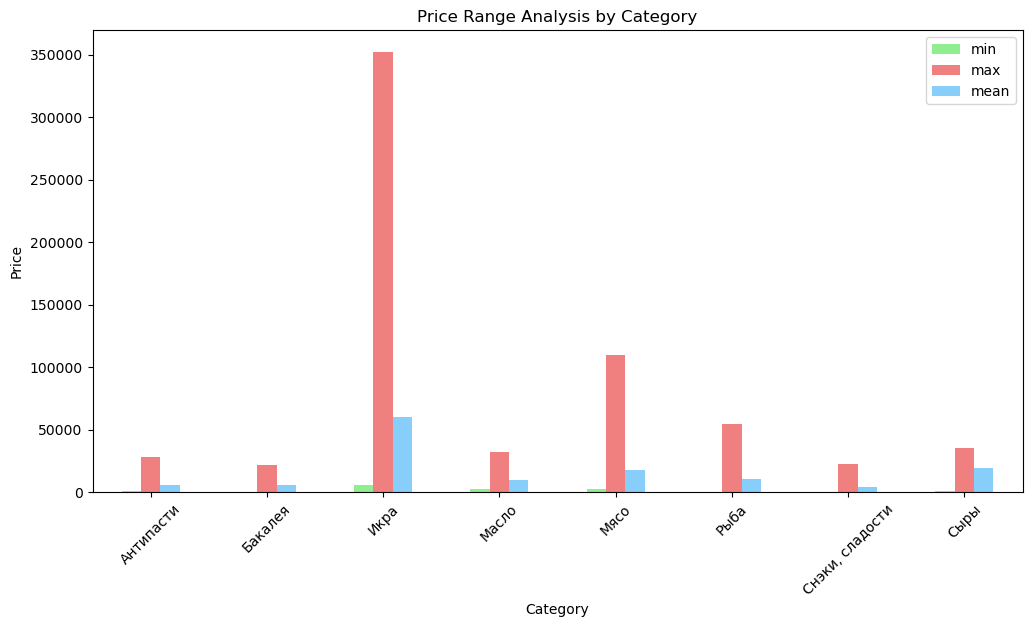

<Figure size 640x480 with 0 Axes>

In [12]:
price_stats_per_category = data.groupby('category')['price'].agg(['min', 'max', 'mean'])
price_stats_per_category.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Price Range Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.savefig('price_range.png', bbox_inches='tight', dpi=300)

Проведенный анализ данных по средним ценам на различные категории продуктов в магазине показал, что икра является безусловным лидером по стоимости, что подтверждает ее премиальный статус. Следующими по цене идут категории "Мясо" и "Сыры", также позиционируемые как более дорогие. Наиболее доступными оказались "Снэки, сладости" и "Бакалея", что может быть связано с широким ассортиментом продуктов в этих категориях. Категории "Антипасти" и "Масло" занимают промежуточное положение. Такое распределение цен свидетельствует об успешной сегментации рынка магазином: категория "Икра" ориентирована на премиальный сегмент, "Снэки, сладости" и "Бакалея" - на массовый, а остальные категории занимают промежуточное положение, предлагая баланс между ценой и качеством.

Анализ также показал, что внутри каждой категории наблюдается значительный разброс цен. Что обозначает что онлайн-магазин имеет широкий ассортимент продуктов подходящих разным клиентам.